# Reproducibility survey

In [139]:
import matplotlib as mpl

BASE = '#404050'  # RGB for titles etc.

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['axes.edgecolor'] = BASE
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.color'] = BASE
mpl.rcParams['ytick.color'] = BASE
mpl.rcParams['text.color'] = BASE
mpl.rcParams['axes.titlecolor'] = BASE
mpl.rcParams['axes.labelcolor'] = BASE

In [140]:
import pandas as pd

df = pd.read_csv('Reproducibility_in_subsurface_geoscience.csv')
df.head()

,Timestamp,What is your main discipline?,What sector do you work in?,What industry does your work related to?,What is your highest level of formal education?,How many years experience do you have working with subsurface data?,Do you think you have conceptual or other biases that impact your work?,Do you publish academic or industry literature?,Do you think there is a reproducibility problem in subsurface geoscience? Reproducibility = the ability to reproduce the results of your own or others' work.,"How much of the geoscience literature, do you think is reproducible? (0 = none, 10 = all)",...,Please specify any other factors you think are important?.2,"How could reproducibility be improved by societies (e.g. EGU, AGU, AAPG) and journals? [Incentives to publish reproduction studies]","How could reproducibility be improved by societies (e.g. EGU, AGU, AAPG) and journals? [Increased journal standards]","How could reproducibility be improved by societies (e.g. EGU, AGU, AAPG) and journals? [Modified journal correction process]","How could reproducibility be improved by societies (e.g. EGU, AGU, AAPG) and journals? [Incentives for replication studies]","How could reproducibility be improved by societies (e.g. EGU, AGU, AAPG) and journals? [Pre-registration of hypotheses to journal]",Please specify any other factors you think are important?.3,Would you be prepared to be interviewed further about this topic?,Name and Company/Institution (optional),Contact email (optional)
0,2020/05/29 4:05:27 PM GMT+1,NaN,Academia,"Research, Teaching and Communication",Post-Doctoral,15-20,Yes (regularly),Yes (regularly),Yes (minor),8,...,NaN,Maybe,NaN,Maybe,NaN,Yes,NaN,No,Test,NaN
1,2020/06/02 9:08:26 AM GMT+1,Geology,Academia,Oil & Gas,Doctoral (PhD),0-5,Yes (sometimes),Yes (sometimes),Yes (minor),6,...,NaN,Yes,Yes,Maybe,Maybe,Maybe,NaN,No,NaN,NaN
2,2020/06/02 9:20:18 AM GMT+1,Geology,Academia,"Research, Teaching and Communication;Oil & Gas",Post-Doctoral,Oct-15,Yes (sometimes),Yes (regularly),Yes (major),7,...,NaN,Yes,Maybe,Maybe,Maybe,Maybe,NaN,NaN,NaN,NaN
3,2020/06/02 9:30:21 AM GMT+1,Geology,Academia,Oil & Gas,Doctoral (PhD),0-5,Yes (regularly),Yes (sometimes),Yes (major),3,...,Providing access to research output can introd...,Yes,Yes,Yes,Yes,NaN,Wasn't quite sure where to write this so forgi...,No,NaN,NaN
4,2020/06/02 9:38:48 AM GMT+1,Geology,Academia;15 years in industry previously,"Research, Teaching and Communication;Mining & ...",Doctoral (PhD),15-20,Yes (regularly),Yes (regularly),Yes (major),7,...,Encouraging open discussion of quality/validit...,Yes,Maybe,Yes,Yes,Yes,NaN,Yes,"Oscar Fernandez, University of Vienna",esparita@gmail.com


In [141]:
for c in df.columns:
    print(c)

Timestamp
What is your main discipline?
What sector do you work in?
What industry does your work related to?
What is your highest level of formal education?
How many years experience do you have working with subsurface data?
Do you think you have conceptual or other biases that impact your work?
Do you publish academic or industry literature?
Do you think there is a reproducibility problem in subsurface geoscience? Reproducibility = the ability to reproduce the results of your own or others' work.
How much of the geoscience literature, do you think is reproducible? (0 = none, 10 = all)
Have you tried to reproduce your own results at a later date?
If yes please detail.
Have you tried to reproduce others' published results?
If yes please detail..1
Have you published (or tried to publish) positive or negative replication findings?
If yes please detail..2
Do you regularly write computer code as part of your work?
What practicalities make published results difficult to reproduce? [Access to

In [142]:
df.shape

(347, 54)

In [143]:
print("First and last reposnses")
df.iloc[0, 0], df.iloc[-1, 0]

First and last reposnses


('2020/05/29 4:05:27 PM GMT+1', '2020/07/05 8:58:14 AM GMT+1')

## Sector

In [144]:
q = "What sector do you work in?"
df[q].value_counts()

Academia                                                          148
Industry                                                          140
Academia;Industry                                                  23
Government                                                         17
Academia;Industry;Government                                        2
Currently looking for work                                          1
Academia;Government                                                 1
Research                                                            1
Research/Consulting                                                 1
Research institute                                                  1
Academia;15 years in industry previously                            1
Non-government research institute                                   1
Industry;Worked in academia for 5 years for PhD and postdoc         1
Indepedent researcher / consultant                                  1
retired fro academia

2 ppl did not respond.

In [145]:
148/347, 140/347

(0.4265129682997118, 0.4034582132564842)

In [146]:
groups = {
    'Academia': ['Academia', 'Currently unemployed. Worked mostly in academia.', 'Education ',
                 'Non-government research institute', 'retired fro academia/industry, now work in PUS',
                 'Academia;15 years in industry previously', 'Research institute', 'Research'],
    'Industry': ['Industry', 'Indepedent researcher / consultant', 'Research/Consulting', 'Consulting',
                'Industry;Worked in academia for 5 years for PhD and postdoc',
                'Ex-Oil&Gas, currently unemployed - independent consultant soon',
                'Currently looking for work'],
    'Government': ['Government',],
    'Mixed': ['Academia;Industry', 'Academia;Industry;Government', 'Academia;Government',
              'Consulting plus academia',],
}

raw_data = df[q].value_counts().to_dict()
data = {g:0 for g in groups}
for group, sectors in groups.items():
    for sector in sectors:
        data[group] += raw_data.get(sector)

data

{'Academia': 155, 'Industry': 146, 'Government': 17, 'Mixed': 27}

In [147]:
[100*v/347 for k, v in data.items()]

[44.668587896253605, 42.07492795389049, 4.899135446685879, 7.780979827089337]

In [148]:
import os
os.path

<module 'posixpath' from '/home/matt/miniconda3/envs/py39/lib/python3.9/posixpath.py'>

In [149]:
import matplotlib.pyplot as plt
import os

def plot_pie(data, fname=None, title=None, size=18, start=60):
    """Give the data dictionary in the order you want the plot."""
    if title is None:
        title = fname or 'Pie chart'
    if fname is None:
        fname = title.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
        fname = os.path.join('figures', fname)

    fig, ax = plt.subplots(figsize=(6, 6))
    props = dict(autopct='%.1f%%', pctdistance=0.8, startangle=start)
    wedges, texts, pcts = ax.pie(data.values(), labels=data.keys(), **props)
    for w, t in zip(wedges, texts):
        t.set_color(w.get_facecolor())
    plt.setp(wedges, width=0.4, edgecolor='white', linewidth=3)
    plt.setp(texts, size=14, fontweight='bold')
    plt.setp(pcts, color='white', size=14, fontweight='bold', )
    ax.text(0, 0, title, ha='center', va='center', size=size, fontweight='bold')
    plt.savefig(f"{fname}.png", dpi=250)
    plt.savefig(f"{fname}.svg")

    return fig, ax

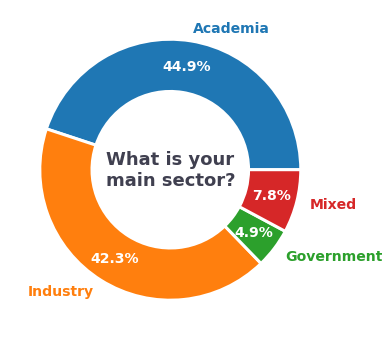

In [150]:
plot_pie(data, title="What is your\nmain sector?", start=0)
plt.show()

In [151]:
import numpy as np

def simple(row):
    global q
    for k, v in groups.items():
        if row[q] in v:
            return k
    return np.nan

df['Sector'] = df.apply(simple, axis=1)

## Discipline

In [152]:
q = 'What is your main discipline?'

df[q].unique()

array([nan, 'Geology', 'Geology & Geophysics', 'Geoscience data',
       'Geophysics', 'signal processing & data science',
       'Planetary Science', 'Software', 'Geology;Geology & Geophysics',
       'Petrophysics', 'Geology;Digital Geology and Computing',
       'Environmental / Global Change Analytics',
       'Geophysics;Hydrogeology', 'Hydrogeology', 'Basin modeling',
       'Geophysics;Geology & Geophysics', 'Geotechnics',
       'Reservoir Engineering', 'Engineering',
       'Archaeological Geophysics', 'hydrogeology',
       'Geophysics;Imaging Science ', 'Geomechanics', 'Teaching',
       'chemometrics (data science applied to chemistry)',
       'Geological engineering', 'Geology;Geomodeling',
       'Geophysics;Computer science',
       'Computational Exploration Seismology', 'Geology;Geography ',
       'Computational Geoscience'], dtype=object)

In [153]:
groups = {
    'Geophysics': ['Geophysics', 'Geophysics;Imaging Science ',
                   'Archaeological Geophysics', 'Geomechanics', 'Geophysics;Computer science'],
    'Geology &\nGeophysics': ['Geology & Geophysics', 'Geology;Geology & Geophysics', 'Geophysics;Geology & Geophysics',
                   'Geoscience data', 'Computational Geoscience'],
    'Geology': ['Geology',
                'Geology;Geomodeling', 'Basin modeling', 'Geology;Geography ',
                'Computational Exploration Seismology', 'Geological engineering',
                'Geology;Digital Geology and Computing',
               ],
    'Other': ['Petrophysics', 'Planetary Science', 'hydrogeology', 'Geophysics;Hydrogeology', 'Hydrogeology',
              'Geotechnics', 'Teaching', 'Reservoir Engineering', 'Engineering', 'Environmental / Global Change Analytics',
              'chemometrics (data science applied to chemistry)', 'Software', 'signal processing & data science',
             ],
}

raw_data = df[q].value_counts().to_dict()
data = {g:0 for g in groups}
for group, discs in groups.items():
    for disc in discs:
        data[group] += raw_data.get(disc)
        
data

{'Geophysics': 84, 'Geology &\nGeophysics': 107, 'Geology': 141, 'Other': 14}

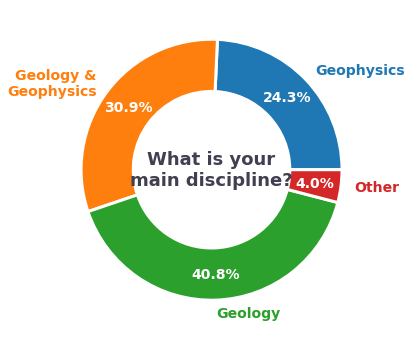

In [154]:
plot_pie(data, title="What is your\nmain discipline?", start=0)
plt.show()

In [155]:
df['Discipline'] = df.apply(simple, axis=1)

## Discipline with code/nocode

In [156]:
q1 = 'What is your main discipline?'
q2 = 'Do you regularly write computer code as part of your work?'

raw_data = pd.crosstab(df[q1], df[q2]).to_dict()
del(raw_data['Yes;No'])

data_ = {}
for r in ['Yes', 'No']:
    data_[r] = {g:0 for g in groups}
    for group, discs in groups.items():
        for disc in discs:
            data_[r][group] += raw_data[r].get(disc, 0)
data_

{'Yes': {'Geophysics': 71,
  'Geology &\nGeophysics': 44,
  'Geology': 49,
  'Other': 11},
 'No': {'Geophysics': 13,
  'Geology &\nGeophysics': 63,
  'Geology': 91,
  'Other': 3}}

In [157]:
detail = {}
for disc, n in data_['Yes'].items():
    detail[f"{disc}-Yes"] = n
    detail[f"{disc}-No"] = data_['No'][disc]
detail

{'Geophysics-Yes': 71,
 'Geophysics-No': 13,
 'Geology &\nGeophysics-Yes': 44,
 'Geology &\nGeophysics-No': 63,
 'Geology-Yes': 49,
 'Geology-No': 91,
 'Other-Yes': 11,
 'Other-No': 3}

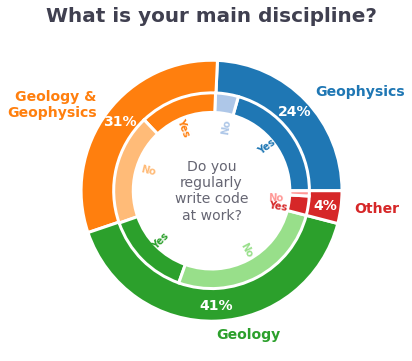

In [158]:
import numpy as np

fname = q1

# Sample the colors for the inner ring.
colors =  plt.cm.tab20(np.linspace(0.025, 0.35, 8))

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, pcts = ax.pie(data.values(), labels=data.keys(), autopct='%.0f%%', pctdistance=0.88,)
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())
plt.setp(texts, size=14, fontweight='bold')
plt.setp(wedges, width=0.4, edgecolor='white', linewidth=3)
plt.setp(pcts, color='white', size=14, fontweight='bold', )

labels = 4 * ["Yes", "No"]
wedges, texts = ax.pie(detail.values(), radius=0.75, colors=colors, labels=labels, rotatelabels=True, labeldistance=0.58)
plt.setp(wedges, width=0.15, edgecolor='white', linewidth=3)
plt.setp(texts, size=10, fontweight='bold')
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())
ax.text(0, 0, "Do you\nregularly\nwrite code\nat work?", ha='center', va='center', size=14, alpha=0.8)
ax.set_title(q1, size=20, fontweight='bold')
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg")

plt.show()

## Education

In [160]:
q = "What is your highest level of formal education?"

df[q].unique()

array(['Post-Doctoral', 'Doctoral (PhD)', 'Masters (MSci, MSc, MS)',
       'Bachelors (BSc, BS)', nan], dtype=object)

In [161]:
df[q].replace('Post-Doctoral', 'Post-Doc', inplace=True)
df[q].replace('Masters (MSci, MSc, MS)', 'Masters', inplace=True)
df[q].replace('Doctoral (PhD)', 'Doctoral', inplace=True)
df[q].replace('Bachelors (BSc, BS)', 'Bachelors', inplace=True)

In [162]:
data = df[q].value_counts(normalize=True)
dd = {k:v for k, v in zip(data.index.to_list(), 100 * data.values)}

In [163]:
# Explicitly give order.
labels = ['Post-Doc', 'Doctoral', 'Masters', 'Bachelors']

x = {l:dd[l] for l in labels}
x

{'Post-Doc': 34.104046242774565,
 'Doctoral': 28.034682080924856,
 'Masters': 30.63583815028902,
 'Bachelors': 7.225433526011561}

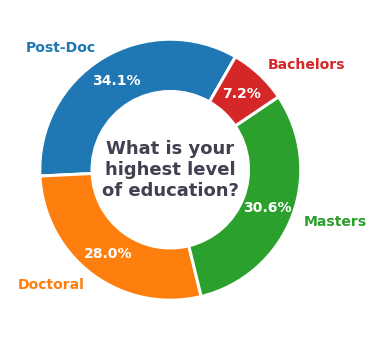

In [164]:
plot_pie(x, title="What is your\nhighest level\nof education?")
plt.show()

## Education again

In [166]:
data = x
data

{'Post-Doc': 34.104046242774565,
 'Doctoral': 28.034682080924856,
 'Masters': 30.63583815028902,
 'Bachelors': 7.225433526011561}

In [167]:
q1 = "What is your highest level of formal education?"
q2 = 'Do you regularly write computer code as part of your work?'

raw_data = pd.crosstab(df[q1], df[q2]).to_dict()
del(raw_data['Yes;No'])
raw_data

{'No': {'Bachelors': 16, 'Doctoral': 46, 'Masters': 50, 'Post-Doc': 58},
 'Yes': {'Bachelors': 9, 'Doctoral': 51, 'Masters': 56, 'Post-Doc': 59}}

In [168]:
detail = {}
for item, n in data.items():
    for r in ['Yes', 'No']:
        detail[f"{item}-{r}"] = raw_data[r][item]
detail

{'Post-Doc-Yes': 59,
 'Post-Doc-No': 58,
 'Doctoral-Yes': 51,
 'Doctoral-No': 46,
 'Masters-Yes': 56,
 'Masters-No': 50,
 'Bachelors-Yes': 9,
 'Bachelors-No': 16}

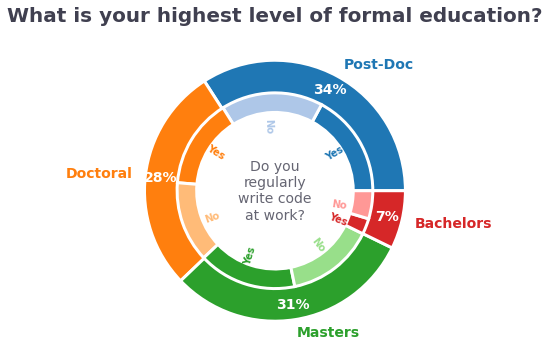

In [169]:
fname = q1.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
fname = os.path.join('figures', fname)

data = x # The raw data for the outer ring.

# Sample the colors for the inner ring.
colors =  plt.cm.tab20(np.linspace(0.025, 0.35, 8))

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, pcts = ax.pie(data.values(), labels=data.keys(), autopct='%.0f%%', pctdistance=0.88,)
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())
plt.setp(texts, size=14, fontweight='bold')
plt.setp(wedges, width=0.4, edgecolor='white', linewidth=3)
plt.setp(pcts, color='white', size=14, fontweight='bold', )

labels = 4 * ["Yes", "No"]
wedges, texts = ax.pie(detail.values(), radius=0.75, colors=colors, labels=labels, rotatelabels=True, labeldistance=0.58)
plt.setp(wedges, width=0.15, edgecolor='white', linewidth=3)
plt.setp(texts, size=10, fontweight='bold')
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())
ax.text(0, 0, "Do you\nregularly\nwrite code\nat work?", ha='center', va='center', size=14, alpha=0.8)
ax.set_title(q1, size=20, fontweight='bold')
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg")

plt.show()

## Self-perceived bias

In [171]:
q = "Do you think you have conceptual or other biases that impact your work?"
df[q].value_counts()

Yes (sometimes)    195
Yes (regularly)    119
Unsure              19
No                  14
Name: Do you think you have conceptual or other biases that impact your work?, dtype: int64

There's only one right answer here! And it looks like those people are more likely to think there's a major reproducibility problem:

In [173]:
pd.crosstab(df[q], df[q1])

What is your highest level of formal education?,Bachelors,Doctoral,Masters,Post-Doc
Do you think you have conceptual or other biases that impact your work?,,,,
No,0,2,7,5
Unsure,1,7,5,6
Yes (regularly),6,40,36,37
Yes (sometimes),18,48,58,70


Those that publish regularly are slightly more self-aware... but not as self-aware as those that don't publish at all!

In [174]:
pd.crosstab(df[q], df[q2])

Do you regularly write computer code as part of your work?,No,Yes,Yes;No
Do you think you have conceptual or other biases that impact your work?,,,
No,8,6,0
Unsure,11,7,1
Yes (regularly),48,71,0
Yes (sometimes),103,92,0


## Experience

Fix the dates that Excel 'fixed' for us:

In [175]:
q = 'How many years experience do you have working with subsurface data?'

df[q].replace('Oct-15', '10-15', inplace=True)
df[q].replace('5-Oct', '5-10', inplace=True)

In [176]:
data = df[q].value_counts(normalize=True)
dd = {k:v for k, v in zip(data.index.to_list(), 100 * data.values)}
labels = list(reversed(['0-5', '5-10', '10-15', '15-20', '20+']))
x = {l:dd[l] for l in labels}
x

{'20+': 27.45664739884393,
 '15-20': 10.115606936416185,
 '10-15': 20.809248554913296,
 '5-10': 27.167630057803464,
 '0-5': 14.450867052023122}

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

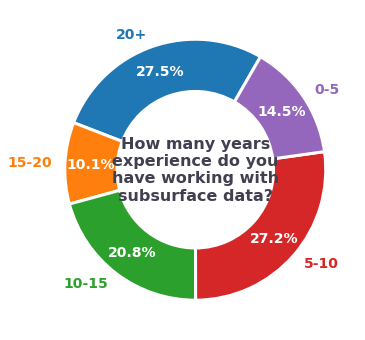

In [177]:
plot_pie(x, title="How many years\nexperience do you\nhave working with\nsubsurface data?", size=16)

## Discipline

In [178]:
q = "What is your main discipline?"

df[q].unique()

array([nan, 'Geology', 'Geology & Geophysics', 'Geoscience data',
       'Geophysics', 'signal processing & data science',
       'Planetary Science', 'Software', 'Geology;Geology & Geophysics',
       'Petrophysics', 'Geology;Digital Geology and Computing',
       'Environmental / Global Change Analytics',
       'Geophysics;Hydrogeology', 'Hydrogeology', 'Basin modeling',
       'Geophysics;Geology & Geophysics', 'Geotechnics',
       'Reservoir Engineering', 'Engineering',
       'Archaeological Geophysics', 'hydrogeology',
       'Geophysics;Imaging Science ', 'Geomechanics', 'Teaching',
       'chemometrics (data science applied to chemistry)',
       'Geological engineering', 'Geology;Geomodeling',
       'Geophysics;Computer science',
       'Computational Exploration Seismology', 'Geology;Geography ',
       'Computational Geoscience'], dtype=object)

## Is there a problem?

In [179]:
q1_ = "Do you think there is a reproducibility problem in subsurface geoscience? Reproducibility = the ability to reproduce the results of your own or others' work."
q1 = q1_.split('?')[0] + '?'

df = df.rename(columns={q1_: q1})

In [180]:
df[q1].value_counts()

Yes (major)    177
Yes (minor)    133
Unsure          22
No              15
Name: Do you think there is a reproducibility problem in subsurface geoscience?, dtype: int64

In [181]:
df[q1].value_counts(normalize=True)

Yes (major)    0.510086
Yes (minor)    0.383285
Unsure         0.063401
No             0.043228
Name: Do you think there is a reproducibility problem in subsurface geoscience?, dtype: float64

In [182]:
q2 = "Do you publish academic or industry literature?"

df[q2].value_counts()

Yes (regularly)    163
Yes (sometimes)    136
No                  48
Name: Do you publish academic or industry literature?, dtype: int64

In [183]:
ct = pd.crosstab(df[q1], df[q2])
ct

Do you publish academic or industry literature?,No,Yes (regularly),Yes (sometimes)
Do you think there is a reproducibility problem in subsurface geoscience?,,,
No,0,11,4
Unsure,4,7,11
Yes (major),19,83,75
Yes (minor),25,62,46


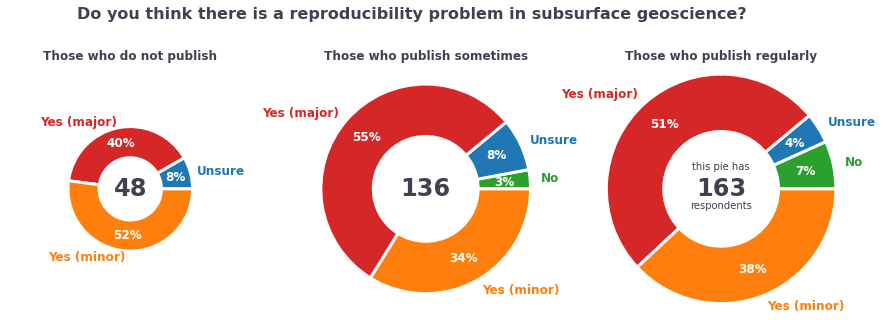

In [184]:
import math

colors = ['C2', 'C0', 'C3', 'C1']  # No, Unsure, Major, Minor

mapping = {
    "No": ("Those who do not publish", "{}"),
    "Yes (sometimes)": ("Those who publish sometimes", "{}"),
    "Yes (regularly)": ("Those who publish regularly", "{}"),
}

fname = "Repro problem vs publishing"
fname = fname.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
fname = os.path.join('figures', fname)

fig, axs = plt.subplots(ncols=len(mapping), figsize=(5*len(mapping), 5.3))
for (publ, title), ax in zip(mapping.items(), axs):
    rad = math.sqrt(ct[publ].sum()/120)
    labels = ct[publ].index.to_list()
    wedges, texts, pcts = ax.pie(ct[publ], radius=rad, colors=colors, labels=labels, autopct='%.0f%%', pctdistance=0.75*rad**.01)
    for pct, text in zip(pcts, texts):
        if pct.get_text() == "0%":
            text.set_alpha(0); pct.set_alpha(0)
    ax.set_title(title[0], size=12, fontweight='bold')
    plt.setp(wedges, edgecolor='white', linewidth=3, width=0.5*rad)
    plt.setp(texts, size=12, fontweight='bold')
    plt.setp(pcts, size=12, fontweight='bold', color='w')
    ax.text(0, 0, title[1].format(ct[publ].sum()), fontweight='bold', size=24, ha='center', va='center')
    for w, t in zip(wedges, texts):
        t.set_color(w.get_facecolor())
ax.text(0,  0.2, "this pie has", ha='center')
ax.text(0, -0.2, "respondents", ha='center')
plt.suptitle(q1, size=16, fontweight='bold')
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg")
plt.show()

In [185]:
163/347, 136/347, 48/347

(0.4697406340057637, 0.3919308357348703, 0.138328530259366)

## Those who code

In [186]:
q3 = "Do you regularly write computer code as part of your work?"
ct = pd.crosstab(df[q1], df[q3])
ct

Do you regularly write computer code as part of your work?,No,Yes,Yes;No
Do you think there is a reproducibility problem in subsurface geoscience?,,,
No,9,6,0
Unsure,15,7,0
Yes (major),67,109,1
Yes (minor),79,54,0


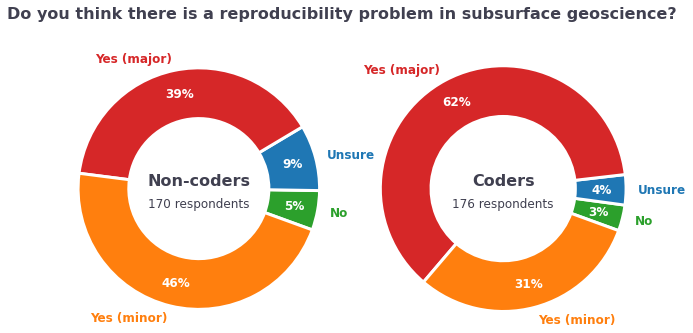

In [187]:
mapping = {
    "No": ("Non-coders", "\n\n{} respondents"),
    "Yes": ("Coders", "\n\n{} respondents"),
}

fname = "Repro problem vs coders"
fname = fname.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
fname = os.path.join('figures', fname)

fig, axs = plt.subplots(ncols=len(mapping), figsize=(5*len(mapping), 5.3))
for (publ, title), ax in zip(mapping.items(), axs):
    labels = ct[publ].index.to_list()
    wedges, texts, pcts = ax.pie(ct[publ], startangle=-20, radius=math.sqrt(ct[publ].sum()/120),colors=colors, labels=labels, autopct='%.0f%%', pctdistance=0.8)
    for pct, text in zip(pcts, texts):
        if pct.get_text() == "0%":
            text.set_alpha(0); pct.set_alpha(0)
    ax.text(0, 0, title[0], size=16, fontweight='bold', ha='center', va='bottom')
    ax.text(0, 0, title[1].format(ct[publ].sum()), size=12, ha='center', va='center')
    plt.setp(wedges, edgecolor='white', linewidth=3, width=0.5)
    plt.setp(texts, size=12, fontweight='bold')
    plt.setp(pcts, size=12, fontweight='bold', color='w')
    for w, t in zip(wedges, texts):
        t.set_color(w.get_facecolor())
plt.suptitle(q1, size=16, fontweight='bold')
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg")
plt.show()

## Problem by discipline

In [188]:
ct = pd.crosstab(df[q1], df['Discipline'])
ct

Discipline,Geology,Geology &\nGeophysics,Geophysics,Other
Do you think there is a reproducibility problem in subsurface geoscience?,,,,
No,8,4,3,0
Unsure,12,6,4,0
Yes (major),59,57,49,12
Yes (minor),62,40,28,2


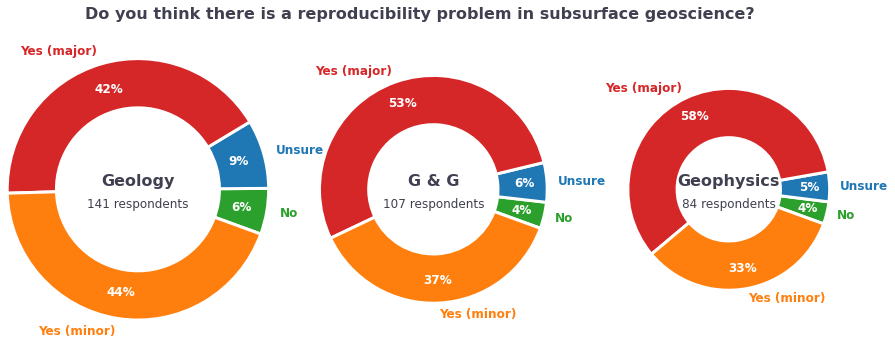

In [189]:
mapping = {
    "Geology": ("Geology", "\n\n{} respondents"),
    "Geology &\nGeophysics": ("G & G", "\n\n{} respondents"),
    "Geophysics": ("Geophysics", "\n\n{} respondents"),
}

fname = "Repro problem vs discipline"
fname = fname.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
fname = os.path.join('figures', fname)

fig, axs = plt.subplots(ncols=len(mapping), figsize=(5*len(mapping), 5.3))
for (publ, title), ax in zip(mapping.items(), axs):
    labels = ct[publ].index.to_list()
    wedges, texts, pcts = ax.pie(ct[publ], startangle=-20, radius=math.sqrt(ct[publ].sum()/80),colors=colors, labels=labels, autopct='%.0f%%', pctdistance=0.8)
    for pct, text in zip(pcts, texts):
        if pct.get_text() == "0%":
            text.set_alpha(0); pct.set_alpha(0)
    ax.text(0, 0, title[0], size=16, fontweight='bold', ha='center', va='bottom')
    ax.text(0, 0, title[1].format(ct[publ].sum()), size=12, ha='center', va='center')
    plt.setp(wedges, edgecolor='white', linewidth=3, width=0.5)
    plt.setp(texts, size=12, fontweight='bold')
    plt.setp(pcts, size=12, fontweight='bold', color='w')
    for w, t in zip(wedges, texts):
        t.set_color(w.get_facecolor())
plt.suptitle(q1, size=16, fontweight='bold')
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg")
plt.show()

## Problem by sector

In [190]:
ct = pd.crosstab(df[q1], df['Sector'])
ct

Sector,Academia,Government,Industry,Mixed
Do you think there is a reproducibility problem in subsurface geoscience?,,,,
No,9,0,3,2
Unsure,10,1,10,1
Yes (major),78,8,74,17
Yes (minor),58,8,59,7


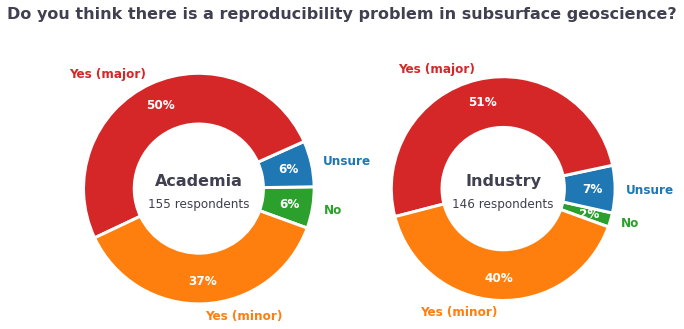

In [191]:
mapping = {
    "Academia": ("Academia", "\n\n{} respondents"),
    "Industry": ("Industry", "\n\n{} respondents"),
}

fname = "Repro problem vs sector"
fname = fname.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
fname = os.path.join('figures', fname)

fig, axs = plt.subplots(ncols=len(mapping), figsize=(5*len(mapping), 5.3))
for (publ, title), ax in zip(mapping.items(), axs):
    labels = ct[publ].index.to_list()
    wedges, texts, pcts = ax.pie(ct[publ], startangle=-20, radius=math.sqrt(ct[publ].sum()/120),colors=colors, labels=labels, autopct='%.0f%%', pctdistance=0.8)
    for pct, text in zip(pcts, texts):
        if pct.get_text() == "0%":
            text.set_alpha(0); pct.set_alpha(0)
    ax.text(0, 0, title[0], size=16, fontweight='bold', ha='center', va='bottom')
    ax.text(0, 0, title[1].format(ct[publ].sum()), size=12, ha='center', va='center')
    plt.setp(wedges, edgecolor='white', linewidth=3, width=0.5)
    plt.setp(texts, size=12, fontweight='bold')
    plt.setp(pcts, size=12, fontweight='bold', color='w')
    for w, t in zip(wedges, texts):
        t.set_color(w.get_facecolor())
plt.suptitle(q1, size=16, fontweight='bold')
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg")
plt.show()

## Reproducibility score

There's a better plot below but I couldn't bear to delete this function.

In [192]:
from matplotlib.ticker import FuncFormatter


ACCENT = 'C2'

def plot_bars(data, fname=None, title=None, accent=None):
    """Give the data dictionary in the order you want the plot."""
    if accent is None:
        accent = ACCENT
    if title is None:
        title = fname or 'Lollipop plot'
    if fname is None:
        fname = title.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
        fname = os.path.join("figures", fname)
        
    x, labels = list(data.values()), list(data.keys())
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.hlines(labels, 0, x, color=ACCENT, alpha=0.4, lw=12)
    plt.plot(x, labels, 'o', ms=14, color=ACCENT)
    ax.set_xlim(-3, 69)
    ax.yaxis.set_major_formatter(
       FuncFormatter(lambda y, pos: ['', 'None','20%','40%','60%','80%','All','' ][pos])
    )
#     ax.set_yticks(labels)
    for xi, yi in zip(x, labels):
        label = f"{100*xi/sum(x):.1f}%"
        ax.text(xi+2, yi, label, ha='left', va='center', color=ACCENT, alpha=0.5, size=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 8))
    ax.spines['bottom'].set_position(('outward', 8))
    ax.spines['left'].set_bounds((-0.5, len(labels)))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.xaxis.grid(c='k', alpha=0.1)
    ax.text(69, 0, "Count", size=16, fontweight='bold', va='center', ha='right')
    ax.text(-8, 11.5, title, size=18, fontweight='bold')
    plt.savefig(f"{fname}.png", dpi=250)
    plt.savefig(f"{fname}.svg")
    return fig, ax

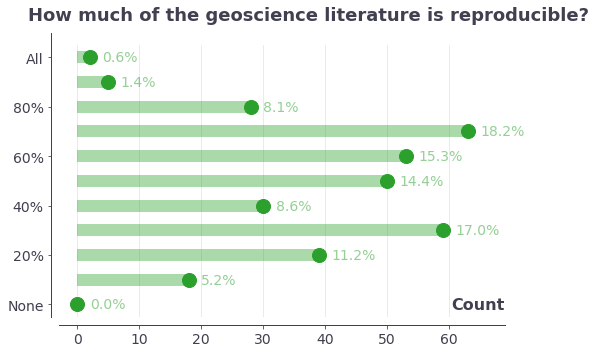

In [193]:
q = "How much of the geoscience literature, do you think is reproducible? (0 = none, 10 = all)"

data = df[q].value_counts(sort=False)
x = {k:v for k, v in zip([0] + list(data.index), [0] + list(data.values))}

plot_bars(x, fname="How much of the geoscience literature is reproducible?", accent='C4')
plt.show()

### Reproduciblity redux

In [194]:
from matplotlib.ticker import FuncFormatter


ACCENT = 'C2'

def plot_bars(data, fname=None, title=None, accent=None):
    """Give the data dictionary in the order you want the plot."""
    if accent is None:
        accent = ACCENT
    if title is None:
        title = fname or 'Tornado plot'
    if fname is None:
        fname = title.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
        fname = os.path.join("figures", fname)
        
    x, labels = list(data.values()), list(data.keys())
    x = np.array(x)
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = plt.cm.RdYlGn(np.array(labels)/10)
    colors[5] = [0.85, 0.85, 0.85, 1]
    ax.hlines(labels, 0, x/2, color=colors, alpha=0.74, lw=18)
    ax.hlines(labels, -x/2, 0, color=colors, alpha=0.74, lw=18)
    ax.yaxis.set_major_formatter(
       FuncFormatter(lambda y, pos: ['', 'None','20%','40%','60%','80%','All','' ][pos])
    )
#     ax.set_yticks(labels)
    for xi, yi in zip(x, labels):
        label = f"{xi}"
        color = 'w' if yi==10 else 'k'
        ax.text(0, yi, label, ha='center', va='center', color=color, alpha=0.8, size=14, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=14)
    ax.xaxis.grid(c='k', alpha=0.1)
    ax.set_xticks([])
    ax.text(2, 10, 'respondents', va='center', size=12, alpha=0.8)
    ax.set_title(title, size=16, fontweight='bold')
    plt.savefig(f"{fname}.png", dpi=250)
    plt.savefig(f"{fname}.svg")
    return fig, ax

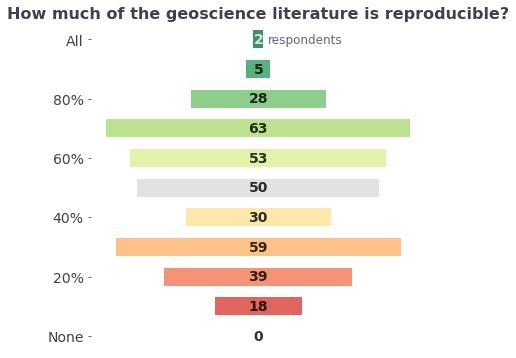

In [195]:
q = "How much of the geoscience literature, do you think is reproducible? (0 = none, 10 = all)"

data = df[q].value_counts(sort=False)
x = {k:v for k, v in zip([0] + list(data.index), [0] + list(data.values))}

plot_bars(x, fname="How much of the geoscience literature is reproducible?", accent='C4')
plt.show()

In [196]:
df[q].mean(), df[q].median(), df[q].mode()

(4.873198847262248,
 5.0,
 0    7
 dtype: int64)

Number thinking that most lit is NOT reproducible vs thinking that most lit IS reproducible.

In [197]:
df.loc[df[q]<=4].count()['Timestamp']/347, df.loc[df[q]>=6].count()['Timestamp']/347

(0.4207492795389049, 0.43515850144092216)

## Attempts to reproduce work

In [198]:
qs = ["Have you tried to reproduce your own results at a later date?",
          "Have you tried to reproduce others' published results?",
          "Have you published (or tried to publish) positive or negative replication findings?",]
for qi in qs:
    print(df[qi].value_counts())
    print()

Yes    210
No     135
Name: Have you tried to reproduce your own results at a later date?, dtype: int64

Yes    210
No     134
Name: Have you tried to reproduce others' published results?, dtype: int64

No     301
Yes     43
Name: Have you published (or tried to publish) positive or negative replication findings?, dtype: int64



In [199]:
(100 * pd.crosstab(df[q], df[q2], normalize=True))

Do you publish academic or industry literature?,No,Yes (regularly),Yes (sometimes)
"How much of the geoscience literature, do you think is reproducible? (0 = none, 10 = all)",,,
1,0.288184,2.881844,2.017291
2,1.152738,5.187320,4.899135
3,2.305476,7.492795,7.204611
4,0.576369,4.322767,3.746398
5,2.017291,6.340058,6.051873
6,2.593660,6.628242,6.051873
7,3.746398,8.357349,6.051873
8,0.864553,4.610951,2.593660
9,0.000000,0.864553,0.576369


<AxesSubplot:xlabel='How much of the geoscience literature, do you think is reproducible? (0 = none, 10 = all)'>

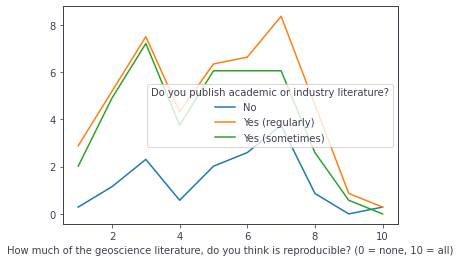

In [200]:
(100 * pd.crosstab(df[q], df[q2], normalize=True)).plot()

This is surprising to me.

In [201]:
r = "Yes"

100*df.loc[df[q2]==r].loc[df[q]<=4].count()['Timestamp']/347

0.0

In [202]:
100*df.loc[df[q2]==r].loc[df[q]>=6].count()['Timestamp']/347

0.0

In [203]:
q1, q2, q3 = qs

100 * pd.crosstab(df[q1], df[q2], normalize=True, margins=True)

Have you tried to reproduce others' published results?,No,Yes,All
Have you tried to reproduce your own results at a later date?,,,
No,23.976608,15.497076,39.473684
Yes,14.912281,45.614035,60.526316
All,38.888889,61.111111,100.000000


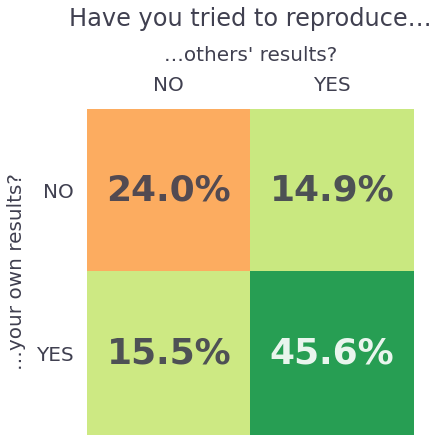

In [204]:
data = 100 * pd.crosstab(df[q1], df[q2], normalize=True).values

data_ = data * [[-1, 1], [1, 1]]  # Hack to get orange NO/NO.

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(data_, cmap='RdYlGn', vmin=-60, vmax=60)
for r, row in enumerate(data):
    for c, n in enumerate(row):
        color = 'w' if n > 33 else BASE
        ax.text(r, c, f"{n:.1f}%", color=color, alpha=0.9, ha='center', va='center', size=36, fontweight="bold")
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.xaxis.tick_top()

fname = "Have you tried to reproduce"
fname = fname.lower().replace(' ', '_').replace('\n', '_').replace('?', '')
fname = os.path.join('figures', fname)

ax.tick_params(axis='both', which='both', length=0, labelsize=20)
nudge = 10
ax.spines['bottom'].set_position(('outward', nudge))
ax.spines['top'].set_position(('outward', nudge))
ax.spines['left'].set_position(('outward', nudge))
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))
ax.set_yticklabels(['NO', 'YES'])
ax.set_xticklabels(['NO', 'YES'])
ax.xaxis.set_label_position('top')
y = ax.set_ylabel("…your own results?", size=20, labelpad=10)
# y.set_rotation(0)
ax.set_xlabel("…others' results?", size=20, labelpad=15)
ax.set_title("Have you tried to reproduce…", size=24, pad=20)
plt.savefig(f"{fname}.png", dpi=250)
plt.savefig(f"{fname}.svg", dpi=250)
plt.show()

## Factors

In [205]:
# Fix a typo.
df = df.rename({
    "What practicalities make published results difficult to reproduce? [Assess to code]":
    "What practicalities make published results difficult to reproduce? [Access to code]"
}, axis=1)

In [206]:
# Shorten a question.
df = df.rename({
    "How could reproducibility be improved by authors? [Pre-registration of hypotheses to third party (e.g. journal or external researcher)]":
    'How could reproducibility be improved by authors? [Pre-registration of hypotheses to third party]'
}, axis=1)

In [207]:
import re

def get_results(q, responses):
    dg = df.loc[:, df.columns.str.startswith(q)]
    dg = dg.rename(columns=lambda c: re.sub('.+ \[(.+)\]', r'\1', c))

    # This is confusing. Pandas is weird.
    results = {}
    for y, c in enumerate(dg.columns):
        this = []
        for r in responses:
            n = dg[c].value_counts()[r]
            this.append(n)
        results[c] = this

    return {k:results[k] for k, v in sorted(results.items(), key=lambda x: x[1][0])}

In [208]:
q = "What practicalities make published results difficult to reproduce?"  # And related.
responses = ['Rarely', 'Sometimes', 'Often']

In [209]:
results = get_results(q, responses)
results

{'Access to data': [9, 61, 266],
 'Methods undocumented': [17, 137, 174],
 'Access to code': [43, 110, 173],
 'Confidentiality/copyright issues': [43, 111, 175],
 'Lack of funding for reproducibility studies': [47, 121, 145],
 'Access to software': [51, 130, 148],
 'Journal standards': [113, 152, 51],
 'Access to journals': [136, 138, 49]}

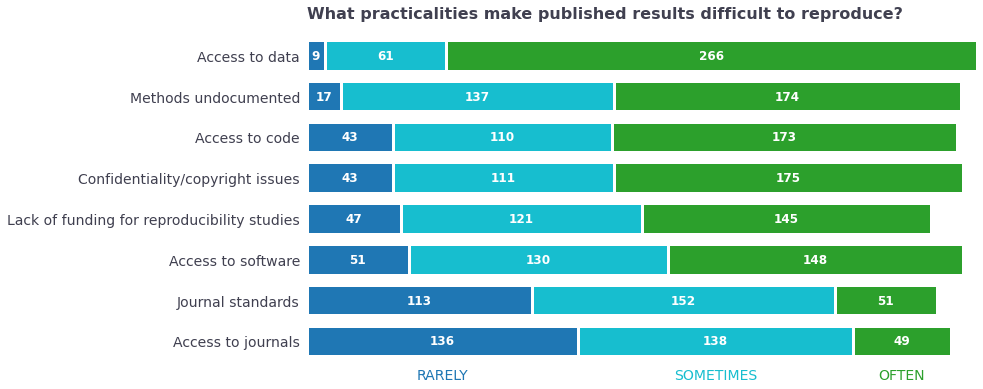

In [210]:
import numpy as np

def survey(results, responses, title=None):
    """
    Plots results.

    Args:
        results (dict): A mapping from question labels to a list of answers
            per category. It is assumed all lists contain the same number of
            entries and that it matches the length of *category_names*.
        category_names (list of str): The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = np.cumsum(data, axis=1)
    category_colors = plt.get_cmap('tab10')([0.05, 0.95, 0.25])

    fig, ax = plt.subplots(figsize=(12, 0.8*len(results)))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    plt.tick_params(axis='y', left=False)

    pos = [0, 0, 0]
    for i, (colname, color) in enumerate(zip(responses, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.75, label=colname, color=color, edgecolor='w', lw=3)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color, size=12, fontweight='bold')
            pos[i] = x
    ax.set_title(title, loc='left', size=16, fontweight='bold')
    for x, r, c in zip(pos, responses, category_colors):
        ax.text(x, len(results), r.upper(), color=c, size=14, ha='center', va='bottom')
    ax.tick_params(axis='y', which='major', labelsize=14)
    plt.savefig(f"{title}.png", dpi=250)
    plt.savefig(f"{title}.svg")

    return fig, ax

survey(results, responses, title=q)
plt.show()

In [211]:
q = 'What factors contribute to irreproducible publications?'
responses = ['Rarely', 'Sometimes', 'Often']

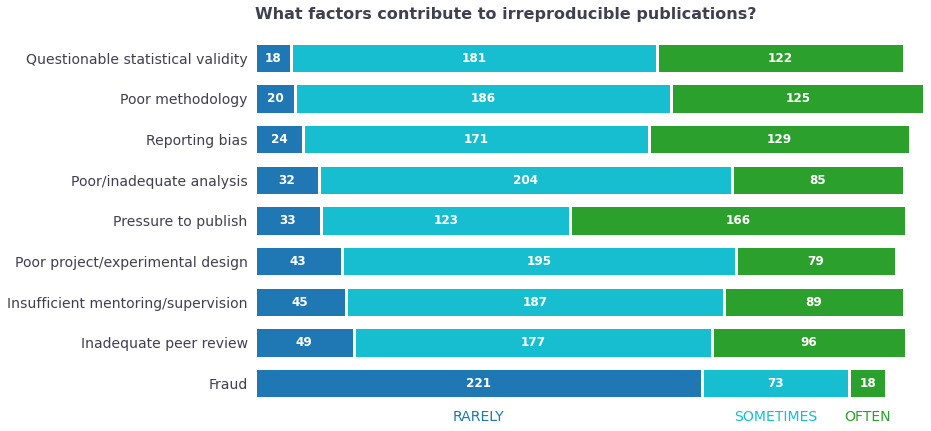

In [212]:
results = get_results(q, responses)

survey(results, responses, title=q)
plt.show()

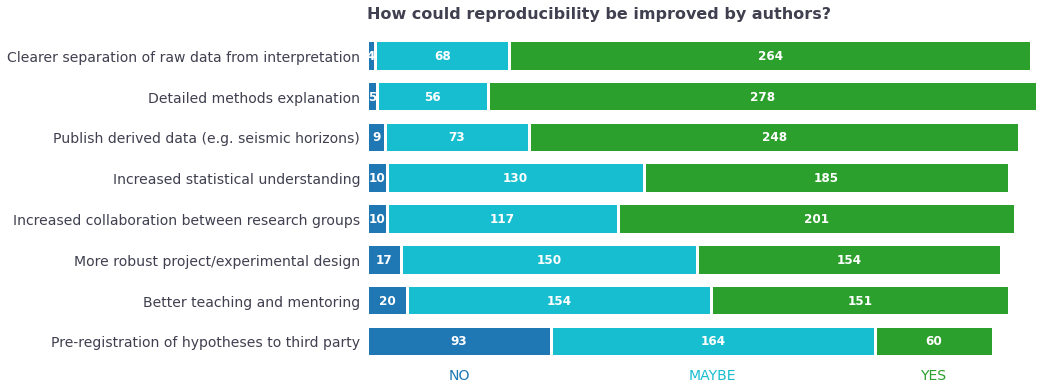

In [213]:
q = 'How could reproducibility be improved by authors?'
responses = ['No', 'Maybe', 'Yes']

results = get_results(q, responses)

survey(results, responses, title=q)
plt.show()

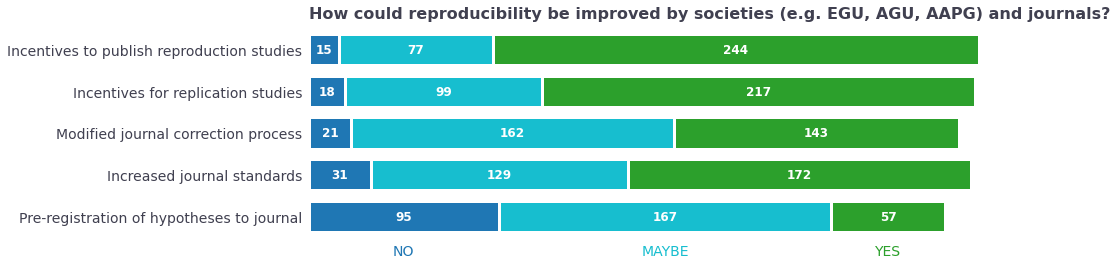

In [214]:
q = 'How could reproducibility be improved by societies (e.g. EGU, AGU, AAPG) and journals?'
responses = ['No', 'Maybe', 'Yes']

results = get_results(q, responses)

survey(results, responses, title=q)
plt.show()